In [1]:
import tensorflow as tf # to import tensorflow in my enviroment
mnist = tf.keras.datasets.mnist # 28*28 images + 70,000 samples from mnist




(x_train , y_train) , ( x_test , y_test) = mnist.load_data() #to load the data from mnist



x_train = tf.keras.utils.normalize(x_train , axis=1) # to normalize the x_train
x_test = tf.keras.utils.normalize(x_test , axis=1)  # to normalize x_test

model = tf.keras.models.Sequential() # to build up your neural networks
model.add(tf.keras.layers.Flatten()) # to convert 3d dim to vector nx1
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # for the first hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # for the second hidden layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # to create the output layer with 10 neurons
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics =['accuracy'])
model.fit(x_train , y_train , epochs = 3) # to start the  training 

11493376/11490434 [==============================] - 1s 0us/step
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2668 - accuracy: 0.9224
Epoch 2/3
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1094 - accuracy: 0.9662
Epoch 3/3
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0730 - accuracy: 0.9770


In [2]:
val_loss , val_acc = model.evaluate(x_test , y_test) # to pass x_test and y_test as a validation
print(val_loss , val_acc) # to print losses and accuracy of validation

10000/10000 [==============================] - 1s 51us/sample - loss: 0.0908 - accuracy: 0.9734
0.09075591049641371 0.9734


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

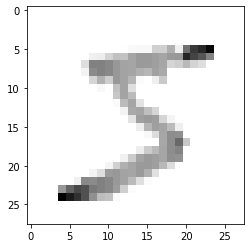

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0] , cmap= plt.cm.binary) # to convert the image toi binary 
plt.show
print(x_train[0])

In [4]:
model.save('epic_num_reader.model') # to save your parameters


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [5]:
new_model = tf.keras.models.load_model('epic_num_reader.model') # to load the parameters

In [7]:
predictions = new_model.predict(x_test)
print(predictions)

[[2.6933138e-09 1.7929256e-06 3.9030208e-05 ... 9.9953175e-01
  7.0903660e-08 3.0029375e-06]
 [3.2898793e-08 4.7101197e-04 9.9952126e-01 ... 1.6760113e-07
  8.9166186e-09 2.8161329e-10]
 [2.7696098e-08 9.9943882e-01 7.4866344e-05 ... 3.2962282e-04
  9.3517898e-05 1.3971397e-06]
 ...
 [4.1920922e-10 6.8292167e-07 6.5547596e-07 ... 4.9852482e-05
  2.7398085e-06 2.9620509e-05]
 [3.1817601e-07 2.3880608e-07 6.9744345e-07 ... 8.2380858e-08
  4.4184207e-04 1.2967327e-07]
 [2.0694060e-07 3.0704503e-09 7.8026012e-08 ... 3.5948074e-11
  1.7085392e-09 2.0819915e-11]]


In [8]:
import numpy as np # to import numpy
print(np.argmax(predictions[9999])) # to get the predicted value of index 0 

6


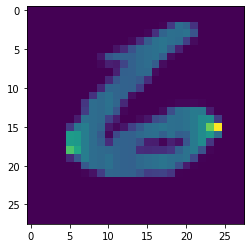

In [11]:
plt.imshow(x_test[9999])
plt.show()